In [1]:
!pip install librosa

     |████████████████████████████████| 183 kB 590 kB/s eta 0:00:01
     |████████████████████████████████| 323 kB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 45 kB 3.0 MB/s eta 0:00:011
  Created wheel for librosa: filename=librosa-0.8.0-py3-none-any.whl size=201374 sha256=2ad70d373665681aa4a8cbe9ac23d6e3fca9a9840ab237f2d36e74d30b2322b4
  Stored in directory: /home/jovyan/.cache/pip/wheels/aa/5a/92/d52f6f8560ff05a2525e6030a1903412df876714241fb76802
  Created wheel for audioread: filename=audioread-2.1.8-py3-none-any.whl size=23091 sha256=851bdffdd6532dc10d94844d9a0655ee7fd3bcb41ec39cff232a1f12321bb793
  Stored in directory: /home/jovyan/.cache/pip/wheels/9b/94/80/3673f65684ab97e08999d1460fc1b238df7701805c739791cd
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320720 sha256=0de44a90c9191ff9d563b6102fc8513c935ebe7d226a487684c77dd62fd40847
  Stored in directory: /home/jovyan/.cache/pip/wheels/6f/d1/5d/f13da53b1dcbc2624ff548456c9ffb526c914f53c12

In [136]:
import librosa
import os
import numpy as np
import random
import librosa.display
import IPython.display as ipd
import pandas as pd 
import matplotlib.pyplot as plt

In [79]:
plt.rcParams['figure.figsize'] = (16, 8)

In [214]:
HT_TAGGING = 0
DR_TAGGING = 1
duration = 5

In [215]:
base_path = "/home/jovyan/work/audio/beatboxset"
wav_files = [file for file in os.listdir(base_path) if file.endswith(".wav")]

In [216]:
random_file = wav_files[random.randrange(0, len(wav_files))]

In [217]:
y, sr = librosa.load(os.path.join(base_path, random_file), duration = duration, offset = 0 )

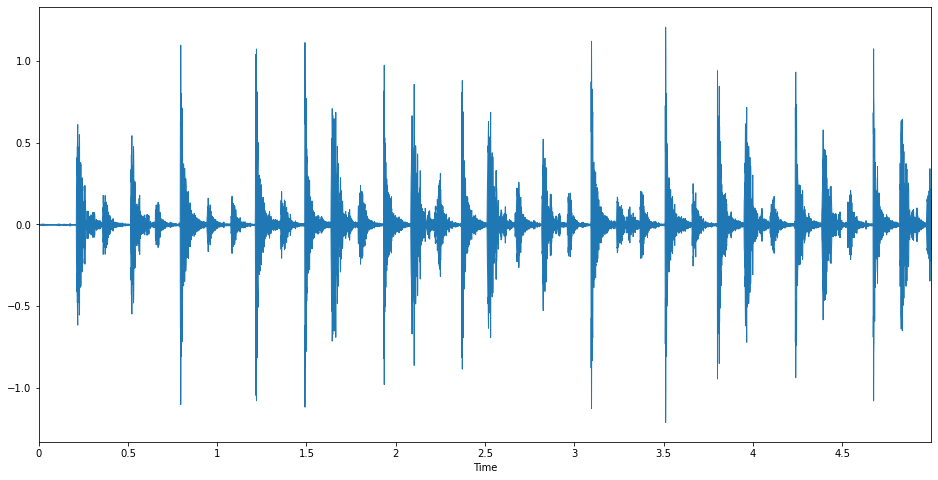

In [218]:
librosa.display.waveplot(y, sr=sr)

In [219]:
ipd.Audio(y, rate=sr)

In [220]:
def load_tagging(filename, type = HT_TAGGING):
    type_dict = { HT_TAGGING:"Annotations_HT", DR_TAGGING:"Annotations_DR" }
    filename = os.path.splitext(filename)[0]
    filename = os.path.join(base_path, type_dict[type], filename + ".csv")
    return pd.read_csv(filename, names=['time', 'tag']) 

    

In [221]:
file_tagging_ht = load_tagging(random_file)
file_tagging_dr = load_tagging(random_file, type = DR_TAGGING)

In [222]:
tempo, beats = librosa.beat.beat_track(y, sr=sr)
beats

array([ 10,  29,  48,  65,  84, 103, 123, 141, 159, 178, 197])

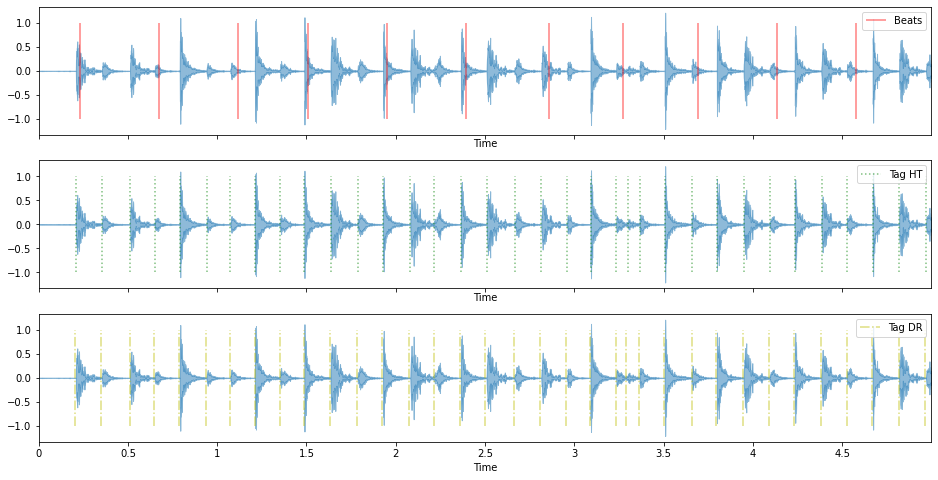

In [224]:

fig, ax = plt.subplots(nrows = 3, sharex=True)
librosa.display.waveplot(y, alpha = 0.5, ax = ax[0])

time_from_frames = librosa.frames_to_time(beats, sr=sr)

ax[0].vlines(time_from_frames, -1, 1, alpha=0.5, color = 'r', linestyle='solid', label="Beats")
librosa.display.waveplot(y, alpha = 0.5, ax = ax[1])
ax[1].vlines(file_tagging_ht[file_tagging_ht.time < duration].time, -1, 1, alpha=0.5, color = 'g', linestyle='dotted', label="Tag HT")
librosa.display.waveplot(y, alpha = 0.5, ax = ax[2])
ax[2].vlines(file_tagging_dr[file_tagging_dr.time < duration].time, -1, 1, alpha=0.5, color = 'y', linestyle='dashdot', label="Tag DR")

[a.legend() for a in ax];


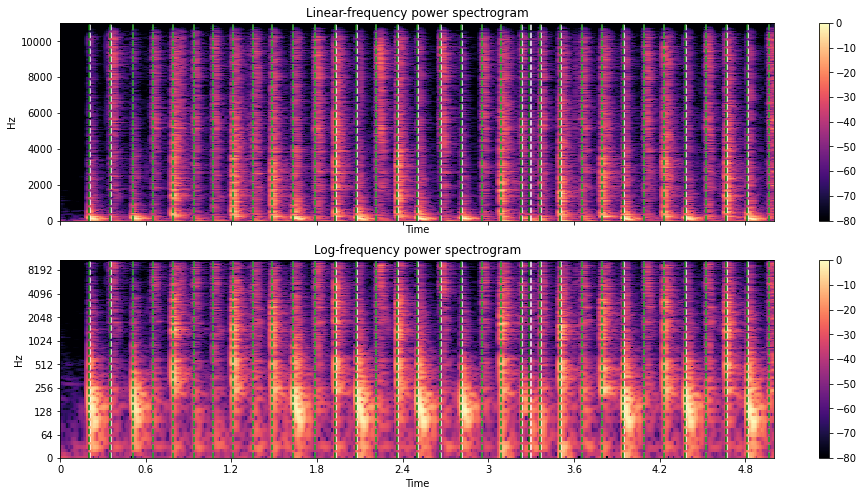

In [225]:
hop_length = 256
S = librosa.stft(y, hop_length = hop_length)
D = librosa.amplitude_to_db(np.abs(S), ref=np.max)
fig, ax = plt.subplots(nrows = 2, sharex=True)
img = librosa.display.specshow(D, y_axis='linear', sr=sr,ax = ax[0], x_axis='time', hop_length = hop_length)
ax[0].vlines(file_tagging_ht[file_tagging_ht.time < duration].time, 0, np.max(librosa.fft_frequencies(sr=sr, n_fft=2)), color = 'w', linestyle='dashed', label="Tag HT")
ax[0].vlines(file_tagging_dr[file_tagging_dr.time < duration].time, 0, np.max(librosa.fft_frequencies(sr=sr, n_fft=2)), color = 'g', linestyle='dashed', label="Tag HT")

fig.colorbar(img, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')

img = librosa.display.specshow(D, y_axis='log', sr=sr,ax = ax[1], x_axis='time', hop_length = hop_length)
fig.colorbar(img, ax=ax[1])

ax[1].set(title='Log-frequency power spectrogram')
ax[1].vlines(file_tagging_ht[file_tagging_ht.time < duration].time, 0, np.max(librosa.fft_frequencies(sr=sr, n_fft=2)), color = 'w', linestyle='dashed', label="Tag HT")
ax[1].vlines(file_tagging_dr[file_tagging_dr.time < duration].time, 0, np.max(librosa.fft_frequencies(sr=sr, n_fft=2)), color = 'g', linestyle='dashed', label="Tag HT")

ax[0].label_outer()
ax[1].label_outer()

